# Проведение парсинга и очистка данных. Перевод всех параметров в числовой формат и просмотр корреляции.


In [1]:
import matplotlib.pyplot as plt # matplotlib для графиков
import seaborn as sns # seaborn для графиков
import numpy as np    # Нампай для массивов
import pandas as pd   # Пандас для данных
import re             # Регулярные выражения
from tensorflow.keras import utils # Для приведения к категориальным данным
from google.colab import files     # Загрузка файлов

In [2]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Загружаем базу
df = pd.read_csv('/content/dataset1.csv')
df

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,248828,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,False,False,True,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси..."
248828,248829,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,более 61 дня,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,True,False,False,0,0
248829,248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,до 42 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."
248830,248831,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."


In [4]:
df = df.reset_index(drop = True) # Переназначем индекс с удалением предыдущего индекса
df # Смотрим результат


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,248828,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,False,False,True,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси..."
248828,248829,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,более 61 дня,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,True,False,False,0,0
248829,248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,до 42 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."
248830,248831,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."


In [5]:
df.count()


id_ответа                                                   248832
Раса                                                        248832
Пол                                                         248832
Возраст                                                     248832
Статус курения                                              248832
ECOG                                                        248832
Есть опухолевая нагрузка? (симптомная опухоль)              248832
Ко-мутации KRAS                                             248832
Ко-мутации p53.                                             248832
Ко-мутации STK11                                            248832
Ко-мутации KEAP1                                            248832
Срок от окончания ХЛТ                                       248832
Молекулярный статус (только для неплоскоклеточного рака)    248832
PD-L1 статус                                                248832
Предпочтение пациента по ответу на терапию                  24

In [6]:
df.nunique()


id_ответа                                                   248832
Раса                                                             3
Пол                                                              2
Возраст                                                          2
Статус курения                                                   3
ECOG                                                             2
Есть опухолевая нагрузка? (симптомная опухоль)                   2
Ко-мутации KRAS                                                  2
Ко-мутации p53.                                                  2
Ко-мутации STK11                                                 2
Ко-мутации KEAP1                                                 2
Срок от окончания ХЛТ                                            3
Молекулярный статус (только для неплоскоклеточного рака)         6
PD-L1 статус                                                     3
Предпочтение пациента по ответу на терапию                    

### узнаем какие уникальные значения имеются в каждом столбце


In [7]:
for name, values in df.items():
  print(name, ":", df[name].unique())

id_ответа : [     1      2      3 ... 248830 248831 248832]
Раса : ['Азиатская' 'Европейская' 'Другая']
Пол : [' Мужской' ' Женский']
Возраст : [' До 70' ' >70']
Статус курения : [' В настоящее время'
 ' Курение в прошлом (бросил более 1 месяца до 1 года)'
 ' Курение в прошлом (бросил более 1 года)']
ECOG : [' 0-1' '2']
Есть опухолевая нагрузка? (симптомная опухоль) : [' да' ' нет']
Ко-мутации KRAS : [' да' ' нет']
Ко-мутации p53. : [' да' ' нет']
Ко-мутации STK11 : [' да' ' нет']
Ко-мутации KEAP1 : [' да' ' нет']
Срок от окончания ХЛТ : ['до 42 дней' 'от 43 до 60 дней' 'более 61 дня']
Молекулярный статус (только для неплоскоклеточного рака) : [' нет мутаций' ' не исследовались' ' EGFR редкий вариант' ' EGFR ex19'
 ' EGFR ex21' ' ALK позитивный']
PD-L1 статус : [' Не исследовался' ' Менее 1%' ' Более 1%']
Предпочтение пациента по ответу на терапию : [' Результативность лечения' ' сохранение качества жизни']
Ответ эксперта (Лактионов) : ['Дурвалумаб' 'Наблюдение' 'Осимертиниб' 'Алектини

** Удаляем столбцы "id_ответа"

In [8]:
del df['id_ответа'] # Удаляем "id_ответа"

In [9]:
df # Смотрим результат

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,от 43 до 60 дней,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,False,False,True,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси..."
248828,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,более 61 дня,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,True,False,False,0,0
248829,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,до 42 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."
248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,от 43 до 60 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."


## Приводим данные к категориальным

In [10]:
df['Раса'] = df['Раса'].replace({'Другая': 0, 'Азиатская': 1, 'Европейская': 2})
df['Пол'] = df['Пол'].replace({' Женский': 0, ' Мужской': 1})
df['Возраст'] = df['Возраст'].replace({' До 70': 0, ' >70': 1})
df['Статус курения'] = df['Статус курения'].replace({' В настоящее время': 0, ' Курение в прошлом (бросил более 1 года)': 1, ' Курение в прошлом (бросил более 1 месяца до 1 года)': 2})
df['ECOG'] = df['ECOG'].replace({' 0-1': 0, '2': 1})
df['Есть опухолевая нагрузка? (симптомная опухоль)'] = df['Есть опухолевая нагрузка? (симптомная опухоль)'].replace({' да': 0, ' нет': 1})
df['Ко-мутации KRAS'] = df['Ко-мутации KRAS'].replace({' да': 0, ' нет': 1})
df['Ко-мутации p53.'] = df['Ко-мутации p53.'].replace({' да': 0, ' нет': 1})
df['Ко-мутации STK11'] = df['Ко-мутации STK11'].replace({' да': 0, ' нет': 1})
df['Ко-мутации KEAP1'] = df['Ко-мутации KEAP1'].replace({' да': 0, ' нет': 1})
df['Срок от окончания ХЛТ'] = df['Срок от окончания ХЛТ'].replace({'до 42 дней': 0, 'от 43 до 60 дней': 1, 'более 61 дня': 2})
df['Молекулярный статус (только для неплоскоклеточного рака)'] = df['Молекулярный статус (только для неплоскоклеточного рака)'].replace({' ALK позитивный': 0, ' EGFR ex19': 1, ' EGFR ex21': 2})
df['Молекулярный статус (только для неплоскоклеточного рака)'] = df['Молекулярный статус (только для неплоскоклеточного рака)'].replace({' EGFR редкий вариант': 3, ' не исследовались': 4, ' нет мутаций': 5})
df['PD-L1 статус'] = df['PD-L1 статус'].replace({' Более 1%': 0, ' Менее 1%': 1, ' Не исследовался': 2})
df['Предпочтение пациента по ответу на терапию'] = df['Предпочтение пациента по ответу на терапию'].replace({' Результативность лечения': 0, ' сохранение качества жизни': 1})
df['Ответ эксперта (Лактионов)'] = df['Ответ эксперта (Лактионов)'].replace({'Алектиниб': 0, 'Дурвалумаб': 1, 'Наблюдение': 2})


In [11]:
df


,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,1,0,0,0,0,0,0,0,0,0,5,2,0,1,True,False,False,0,0
1,1,1,0,0,0,0,0,0,0,0,1,5,2,0,1,True,False,False,0,0
2,1,1,0,0,0,0,0,0,0,0,2,5,2,0,2,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,1,1,0,0,0,0,0,0,0,0,0,4,2,0,1,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,1,1,0,0,0,0,0,0,0,0,1,4,2,0,1,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,0,0,1,1,1,1,1,1,1,1,1,2,0,1,2,False,False,True,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси..."
248828,0,0,1,1,1,1,1,1,1,1,2,2,0,1,2,True,False,False,0,0
248829,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."
248830,0,0,1,1,1,1,1,1,1,1,1,0,0,1,0,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Раса                                                      248832 non-null  int64 
 1   Пол                                                       248832 non-null  int64 
 2   Возраст                                                   248832 non-null  int64 
 3   Статус курения                                            248832 non-null  int64 
 4   ECOG                                                      248832 non-null  int64 
 5   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  int64 
 6   Ко-мутации KRAS                                           248832 non-null  int64 
 7   Ко-мутации p53.                                           248832 non-null  int64 
 8   Ко-мутации STK

<ipython-input-13-adee93c01817>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr('spearman')


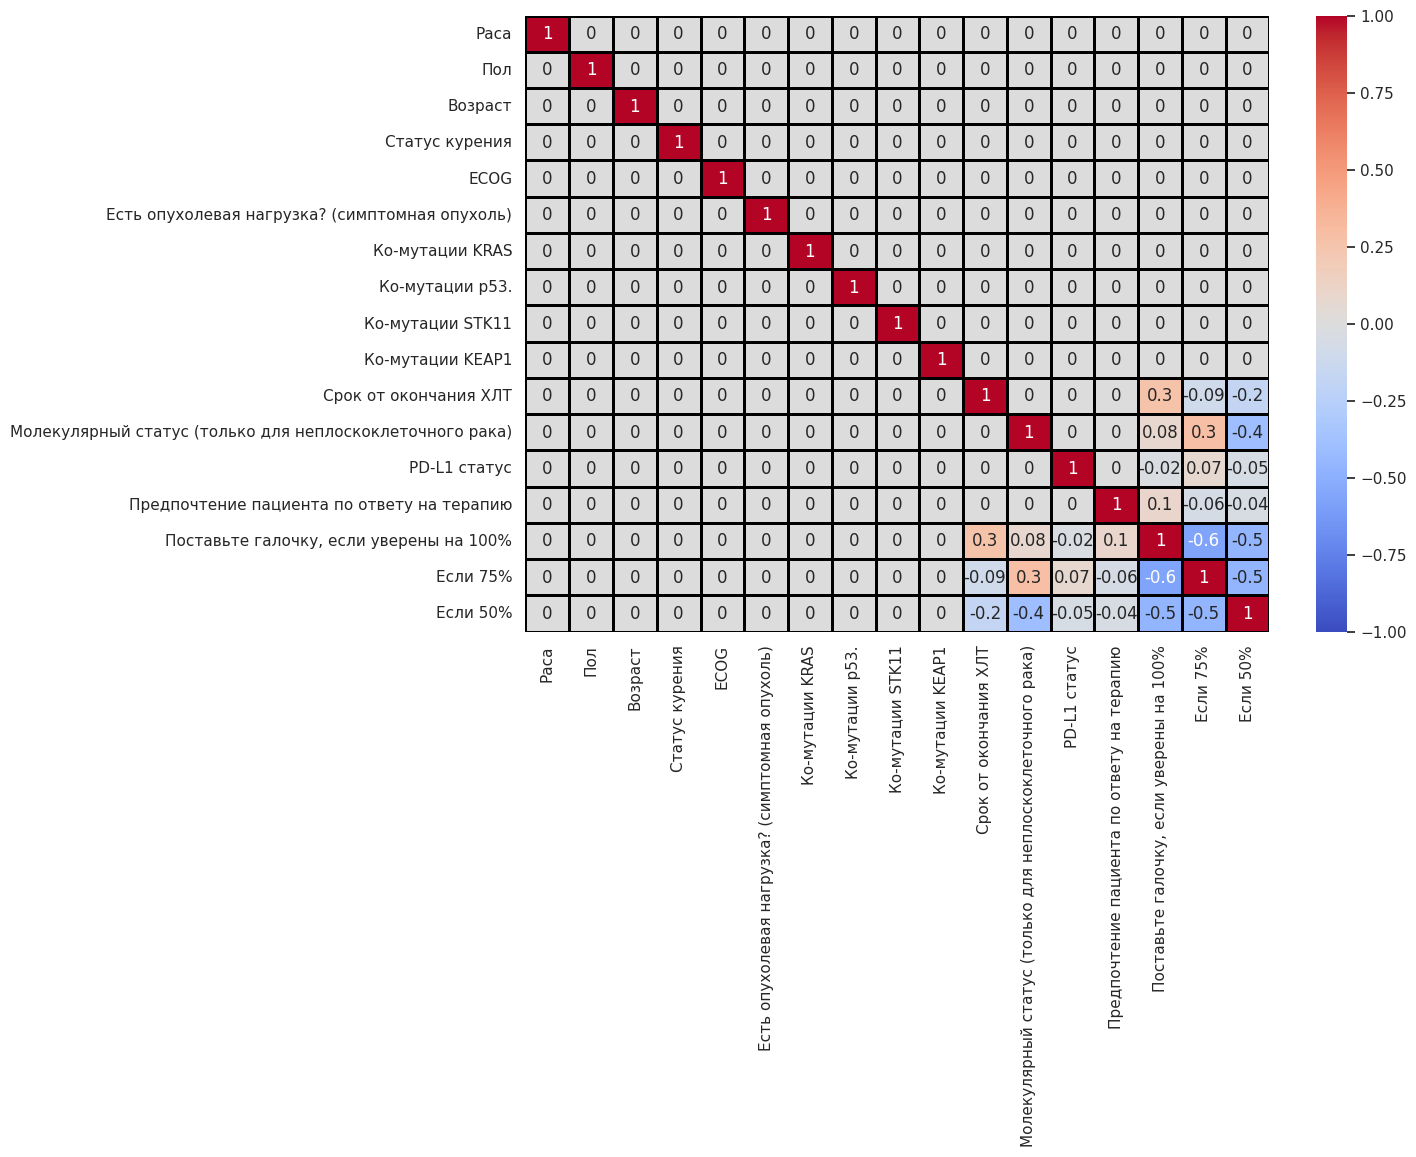

In [13]:
# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

sns.set(style='whitegrid', palette='muted')  # Включаем режим seaborn. Теперь даже методы от matplotlib будут отображаться в этом стиле.
                                             # whitegrid - белая сетка
                                             # muted - палитра для отображения

# Метод, подсчитывающий попарную корреляцию для элементов.
corr_matrix = df.corr('spearman')

# Можно указать в параметрах способ подсчета.
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')
plt.show()


In [14]:
# Работа с массивами данных
import numpy as np

# Работа с табличными данными
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# Загрузка датасетов из облака google
import gdown

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline


В представленной таблице собраны данные пациентов после ПХТ 3 стадии. Нашим целевым параметром (значением, которое должна будет предсказать нейронная сеть), будет колонка "Ответ эксперта (Лактионов)".

Остальные столбцы (за исключением пяти последних) мы будем использовать как x_train, в качестве оцениваемых параметров.

Наша главная задача: подготовить данные для подачи в сеть. В таблице собраны данные различных типов: текстовые, числовые, категориальные. Все это нужно правильно обработать перед подачей в сеть. Для каждого столбца мы подготовим специальную функцию, которая будет парсить (обрабатывать) данные из этого столбца. В итоге мы подготовим обучающую выборку, содержащую все данные из представленной таблицы.

# Cоздаем словари и списки значений для разбиения на классы


In [15]:
# Список порогов рассы
rasa_class = [0,
              {'Азиатская'          : 0,
               'Европейская'        : 1,
               'Другая'             : 2
              }]
# Список порогов пола
sex_class = [0,
             {'Женский'        : 0,
              'Мужской'        : 1
             }]
# Список порогов возраста
age_class = [0,
             {'До 70'        : 0,
              '> 70'         : 1
             }]
# Список порогов статуса курения
smoking_class = [0,
              {'В настоящее время'                                          : 0,
               'Курение в прошлом (бросил более 1 месяца до 1 года)'        : 1,
               'Курение в прошлом (бросил более 1 месяца до 1 года)'        : 2
              }]
# Список порогов ECOG
ecog_class = [0,
             {'0-1'        : 0,
              '2'          : 1
             }]
# Список порогов симптомной опухоли
tumor_class = [0,
             {'да'        : 0,
              'нет'       : 1
             }]

# Список порогов KRAS
kras_class = [0,
             {'да'        : 0,
              'нет'       : 1
             }]
# Список порогов p53
p53_class = [0,
             {'да'        : 0,
              'нет'       : 1
             }]
# Список порогов STK11
stk11_class = [0,
             {'да'        : 0,
              'нет'       : 1
             }]
# Список порогов KEAP1
keap1_class = [0,
             {'да'        : 0,
              'нет'       : 1
             }]
# Список порогов статуса cрока от окончания ХЛТ
end_of_the_xlt_class = [0,
              {'более 61 дня'                    : 0,
               'до 42 дней'                      : 1,
               'от 43 до 60 дней'                : 2
              }]
# Список порогов молекулярного статуса
molecular_class = [0,
              {'ALK позитивный'                    : 0,
               'EGFR ex19'                         : 1,
               'EGFR ex21'                         : 2,
               'EGFR редкий вариант'               : 3,
               'не исследовались'                  : 4,
               'нет мутаций'                       : 5
              }]
# Список порогов статуса PD-L1
pd_l1_class = [0,
              {'Не исследовался'                 : 0,
               'Более 1%'                        : 1,
               'Менее 1%'                        : 2
              }]
# Список порогов gредпочтение пациента по ответу на терапию
patient_preference_class = [0,
                            {'Результативность лечения'        : 0,
                             'сохранение качества жизни'       : 1
                            }]
# Список порогов Ответ эксперта (Лактионов)
expert_answer_class = [0,
                       {'Алектиниб'                   : 0,
                       'Дурвалумаб'                   : 1,
                       'Наблюдение'                   : 2,
                       'Осимертиниб'                  : 3
                       }]




In [16]:
df


,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,1,0,0,0,0,0,0,0,0,0,5,2,0,1,True,False,False,0,0
1,1,1,0,0,0,0,0,0,0,0,1,5,2,0,1,True,False,False,0,0
2,1,1,0,0,0,0,0,0,0,0,2,5,2,0,2,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,1,1,0,0,0,0,0,0,0,0,0,4,2,0,1,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,1,1,0,0,0,0,0,0,0,0,1,4,2,0,1,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,0,0,1,1,1,1,1,1,1,1,1,2,0,1,2,False,False,True,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси..."
248828,0,0,1,1,1,1,1,1,1,1,2,2,0,1,2,True,False,False,0,0
248829,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."
248830,0,0,1,1,1,1,1,1,1,1,1,0,0,1,0,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."


In [17]:
# Вычисление счетчиков для данных разбиения
for class_desc in [rasa_class,
                   sex_class,
                   age_class,
                   smoking_class,
                   ecog_class,
                   tumor_class,
                   kras_class,
                   p53_class,
                   stk11_class,
                   keap1_class,
                   end_of_the_xlt_class,
                   molecular_class,
                   pd_l1_class,
                   patient_preference_class,
                   expert_answer_class]:
    if isinstance(class_desc[1], list):
        class_desc[0] = len(class_desc[1]) + 1
    else:
        class_desc[0] = max(class_desc[1].values()) + 1


In [18]:
# для примера выведем список класов некоторых столбцов
print("Список порогов рассы", rasa_class)
print("Список порогов пола", sex_class)
print("Список порогов Ответ эксперта", expert_answer_class)


Список порогов рассы [3, {'Азиатская': 0, 'Европейская': 1, 'Другая': 2}]
Список порогов пола [2, {'Женский': 0, 'Мужской': 1}]
Список порогов Ответ эксперта [4, {'Алектиниб': 0, 'Дурвалумаб': 1, 'Наблюдение': 2, 'Осимертиниб': 3}]


Функцию int_to_ohe() возвращаем one hot encoding для представления значения класса.


In [19]:
def int_to_ohe(arg, class_list):

    # Определение размерности выходного вектора
    num_classes = class_list[0]

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg < class_list[1][i]:
            cls = i                       # Интервал найден - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1              # Интервал не найден - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)


In [20]:
# Общая функция преобразования строки к multi-вектору
# На входе данные и словарь сопоставления подстрок классам

def str_to_multi(arg, class_dict):
    # Определение размерности выходного вектора
    num_classes = class_dict[0]

    # Создание нулевого вектора
    result = np.zeros(num_classes)

    # Поиск значения в словаре и, если найдено,
    # выставление 1. на нужной позиции
    for value, cls in class_dict[1].items():
        if value in arg:
            result[cls] = 1.

    return result

In [21]:
text = 'Мужской'
print(text)
print(str_to_multi(text, sex_class))
text1 = 'Азиатская'
print(text1)
print(str_to_multi(text1, rasa_class))
text2 = 'Осимертиниб'
print(text2)
print(str_to_multi(text2, expert_answer_class))




Мужской
[0. 1.]
Азиатская
[1. 0. 0.]
Осимертиниб
[0. 0. 0. 1.]


In [22]:
# Применение One-Hot Encoding
encoded_df = pd.get_dummies(df)

encoded_df

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,...,Комментарий_Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба,Комментарий_Возможна низкая эффективность Дурвалумаба при PD-1 < 1%,"Комментарий_Возможна низкая эффективность Дурвалумаба при PD-1 < 1%, возможно есть активирующие мутации","Комментарий_Возможна низкая эффективность Дурвалумаба, Алектиниб без доказательной базы","Комментарий_Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы","Комментарий_Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эффективность Осимертиниба ниже при 21 экзоне",Комментарий_Возможно есть мутации и эффективность Дурвалумаба будет низкой,"Комментарий_Возможно есть мутации и эффективность Дурвалумаба будет низкой\n, Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба","Комментарий_Возможно есть мутации и эффективность Дурвалумаба будет низкой\n, Возможна низкая эффективность Дурвалумаба при PD-1 < 1%",Комментарий_Нет доказательной базы для назначения после перерыва >61 дня после ХЛТ
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
248828,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
248829,0,0,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
248830,0,0,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0


In [23]:
encoded_df.columns

Index(['Раса', 'Пол', 'Возраст', 'Статус курения', 'ECOG',
       'Есть опухолевая нагрузка? (симптомная опухоль)', 'Ко-мутации KRAS',
       'Ко-мутации p53.', 'Ко-мутации STK11', 'Ко-мутации KEAP1',
       'Срок от окончания ХЛТ',
       'Молекулярный статус (только для неплоскоклеточного рака)',
       'PD-L1 статус', 'Предпочтение пациента по ответу на терапию',
       'Поставьте галочку, если уверены на 100%', 'Если 75%', 'Если 50%',
       'Ответ эксперта (Лактионов)_0', 'Ответ эксперта (Лактионов)_1',
       'Ответ эксперта (Лактионов)_2',
       'Ответ эксперта (Лактионов)_Осимертиниб',
       'Альтернатива, если 50% - обязательно_0',
       'Альтернатива, если 50% - обязательно_Алектиниб',
       'Альтернатива, если 50% - обязательно_Дурвалумаб',
       'Альтернатива, если 50% - обязательно_Наблюдение',
       'Альтернатива, если 50% - обязательно_Осимертиниб', 'Комментарий_0',
       'Комментарий_Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба',
  

In [24]:
data_x = encoded_df[['Раса', 'Пол', 'Возраст', 'Статус курения', 'ECOG',
       'Есть опухолевая нагрузка? (симптомная опухоль)', 'Ко-мутации KRAS',
       'Ко-мутации p53.', 'Ко-мутации STK11', 'Ко-мутации KEAP1',
       'Срок от окончания ХЛТ',
       'Молекулярный статус (только для неплоскоклеточного рака)',
       'PD-L1 статус', 'Предпочтение пациента по ответу на терапию']]
data_y = encoded_df[['Ответ эксперта (Лактионов)_0', 'Ответ эксперта (Лактионов)_1',
       'Ответ эксперта (Лактионов)_2',
       'Ответ эксперта (Лактионов)_Осимертиниб']]
data_x


,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию
0,1,1,0,0,0,0,0,0,0,0,0,5,2,0
1,1,1,0,0,0,0,0,0,0,0,1,5,2,0
2,1,1,0,0,0,0,0,0,0,0,2,5,2,0
3,1,1,0,0,0,0,0,0,0,0,0,4,2,0
4,1,1,0,0,0,0,0,0,0,0,1,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,0,0,1,1,1,1,1,1,1,1,1,2,0,1
248828,0,0,1,1,1,1,1,1,1,1,2,2,0,1
248829,0,0,1,1,1,1,1,1,1,1,0,0,0,1
248830,0,0,1,1,1,1,1,1,1,1,1,0,0,1


In [25]:
data_y


,Ответ эксперта (Лактионов)_0,Ответ эксперта (Лактионов)_1,Ответ эксперта (Лактионов)_2,Ответ эксперта (Лактионов)_Осимертиниб
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
248827,0,0,1,0
248828,0,0,1,0
248829,1,0,0,0
248830,1,0,0,0


<ipython-input-26-411936e64c0f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


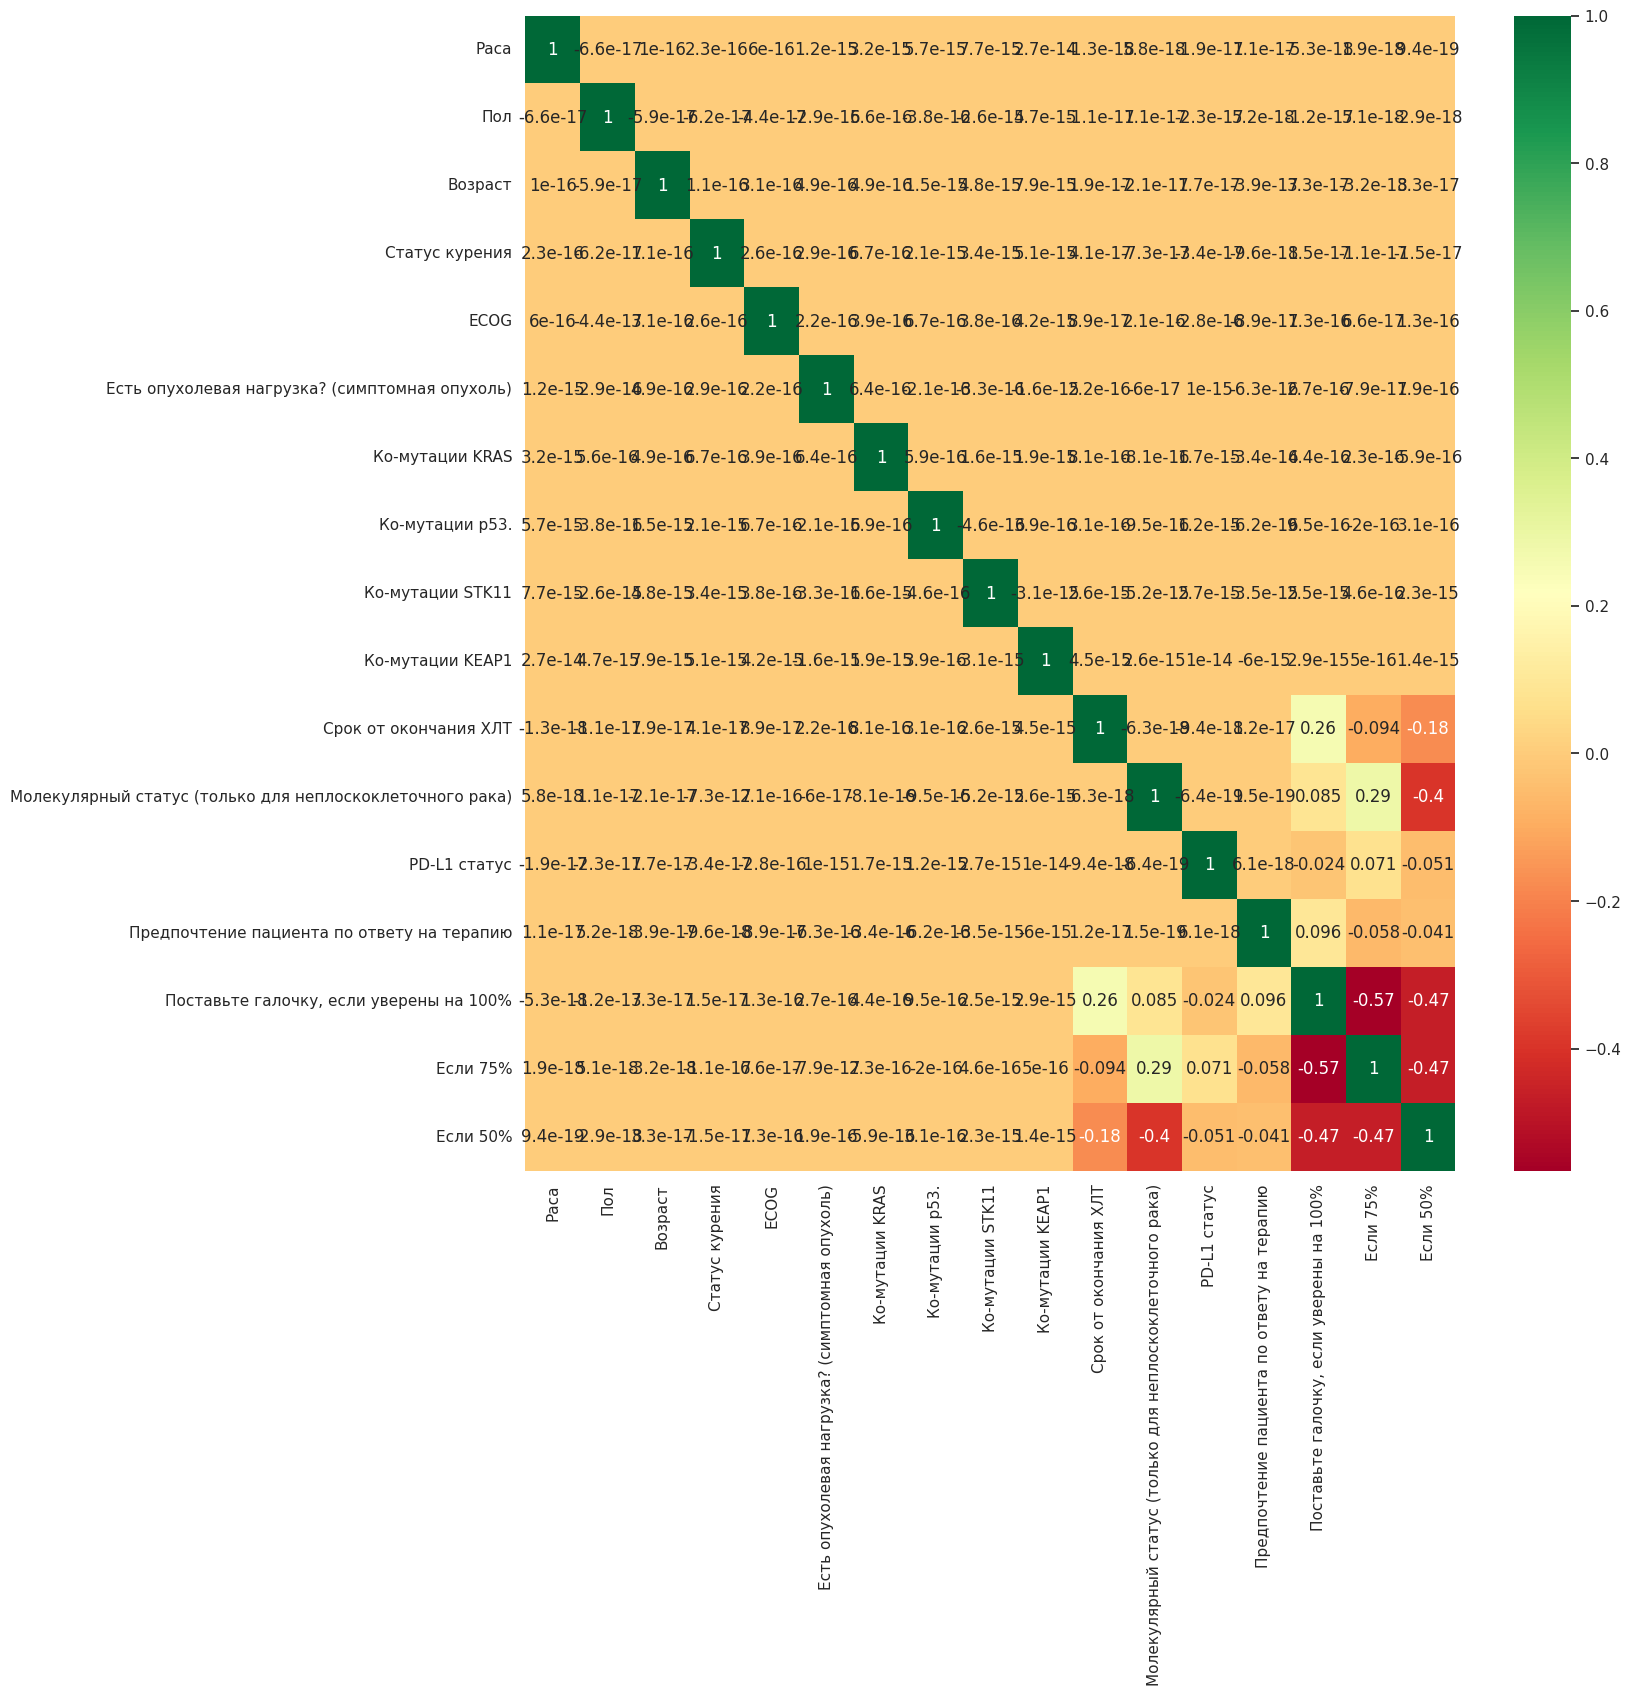

In [26]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


[7.59285412e-18 0.00000000e+00 0.00000000e+00 5.66225084e-18
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.18123198e-01 5.81833774e-01
 5.46921046e-02 4.53509229e-02]


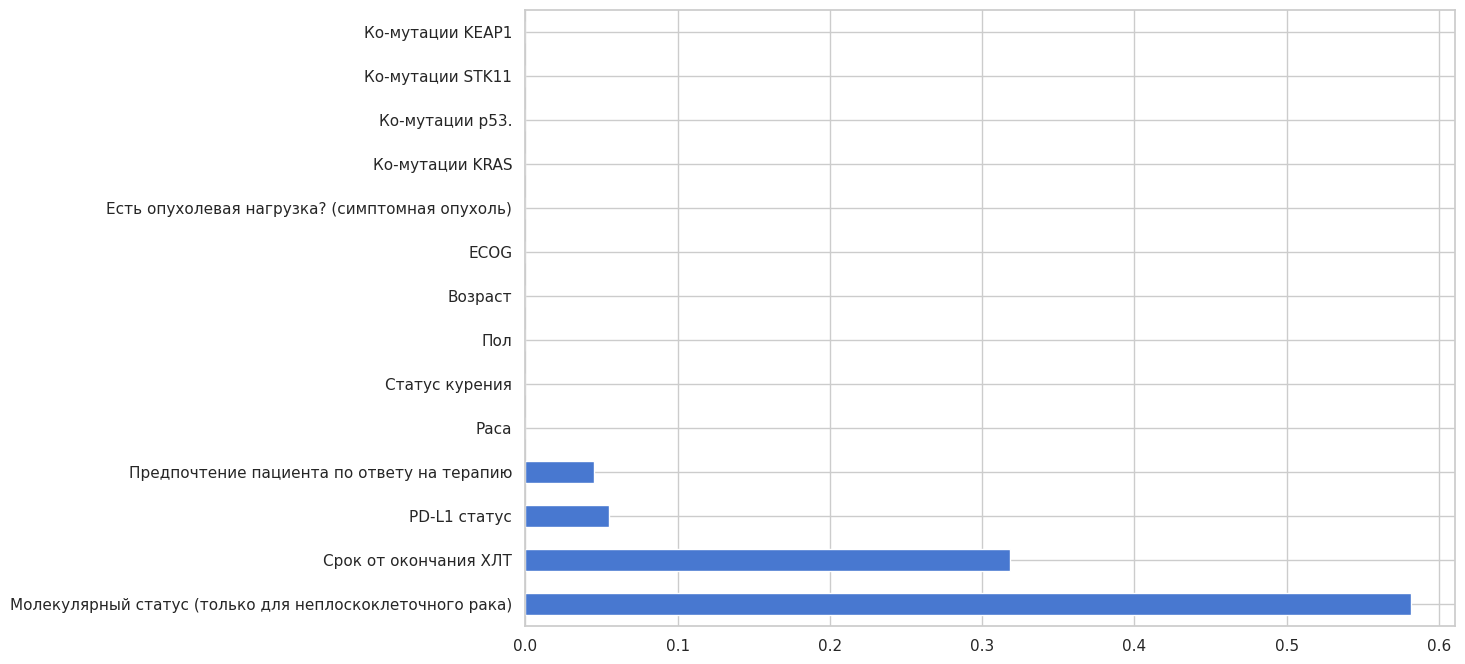

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(data_x,data_y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data_x.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()



In [28]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Библиотека для работы с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from sklearn.datasets import load_wine

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

Разбиваем выборки

In [29]:
# Разбиение наборов на общую и тестовую выборки

x_all, x_test, y_all, y_test = train_test_split(data_x,
                                                data_y,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(201553, 14)
(201553, 4)

(22395, 14)
(22395, 4)


In [30]:
# посмотрим на данные
x_train.iloc[3]


Раса                                                        1
Пол                                                         1
Возраст                                                     0
Статус курения                                              0
ECOG                                                        0
Есть опухолевая нагрузка? (симптомная опухоль)              0
Ко-мутации KRAS                                             1
Ко-мутации p53.                                             0
Ко-мутации STK11                                            1
Ко-мутации KEAP1                                            1
Срок от окончания ХЛТ                                       1
Молекулярный статус (только для неплоскоклеточного рака)    1
PD-L1 статус                                                1
Предпочтение пациента по ответу на терапию                  1
Name: 202258, dtype: int64

In [31]:
# посмотрим целевые классы
y_train.tail()


,Ответ эксперта (Лактионов)_0,Ответ эксперта (Лактионов)_1,Ответ эксперта (Лактионов)_2,Ответ эксперта (Лактионов)_Осимертиниб
148580,0,0,1,0
223283,0,0,0,1
81799,0,0,1,0
194548,0,1,0,0
186586,1,0,0,0


## Создание модели


### Составим списки гиперпараметров которые будем изменять в процессе обучения:

In [32]:
dense_1 = [100, 400, 700] # кол-во нейронов во входном слое
drop_1  = [0.15, 0.25, 0.4] # доля отключаемых нейронов

parameters = []

Параметры модели: 100 0.15
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1500      
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 404       
                                                                 
Total params: 12004 (46.89 KB)
Trainable params: 12004 (46.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.1306 - accuracy: 0.9522 - val_loss: 0.0021 - 

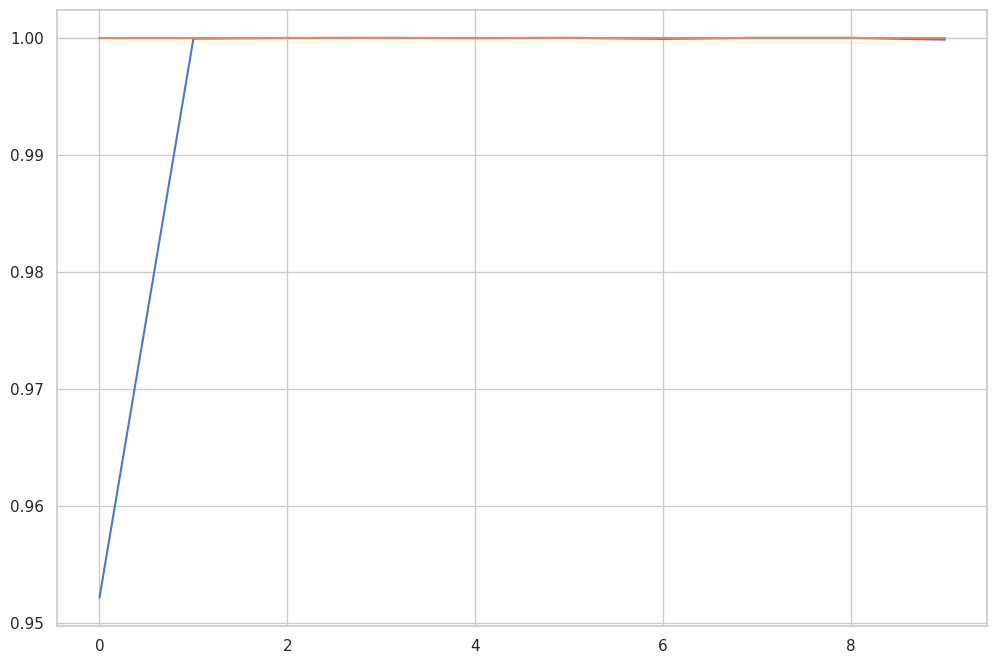

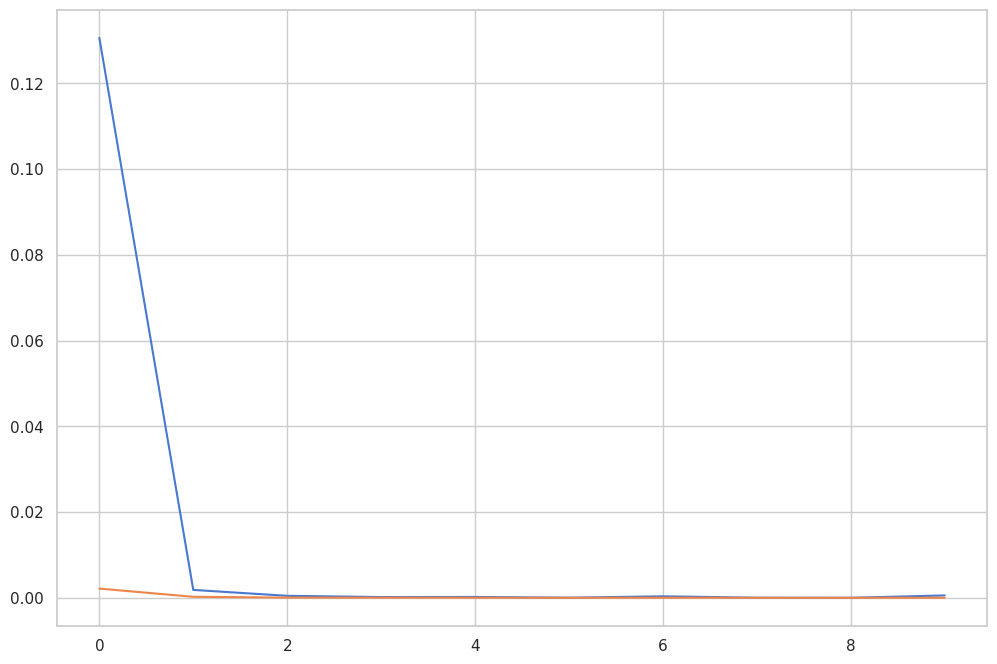

Параметры модели: 100 0.25
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1500      
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 4)                 404       
                                                                 
Total params: 12004 (46.89 KB)
Trainable params: 12004 (46.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1575/1575 [==============================] - 7s 4ms/step - loss: 0.1468 - accuracy: 0.9455 - val_loss: 0.0039 - 

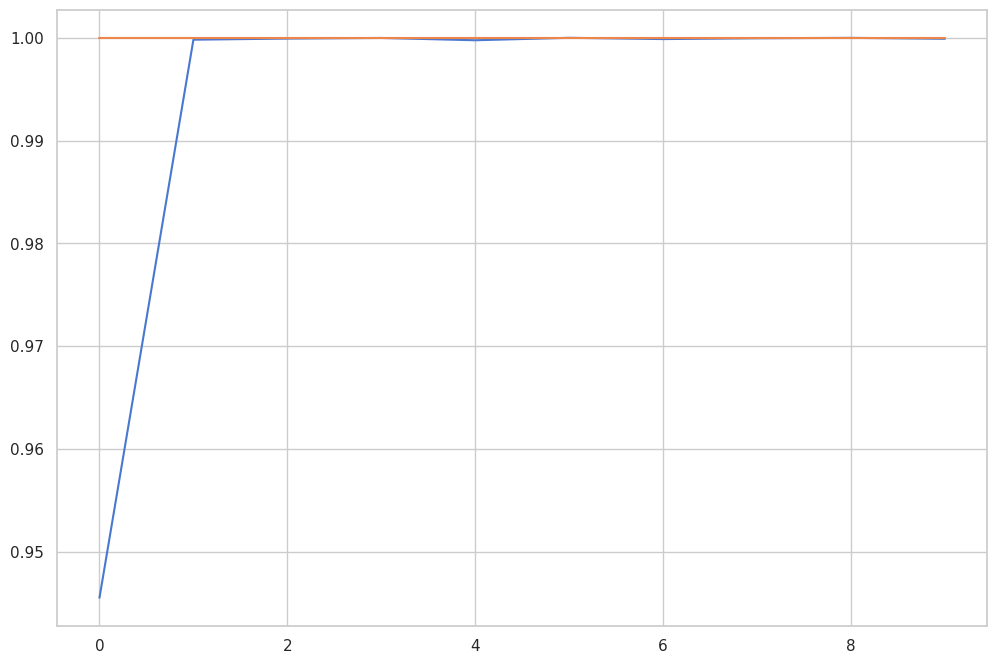

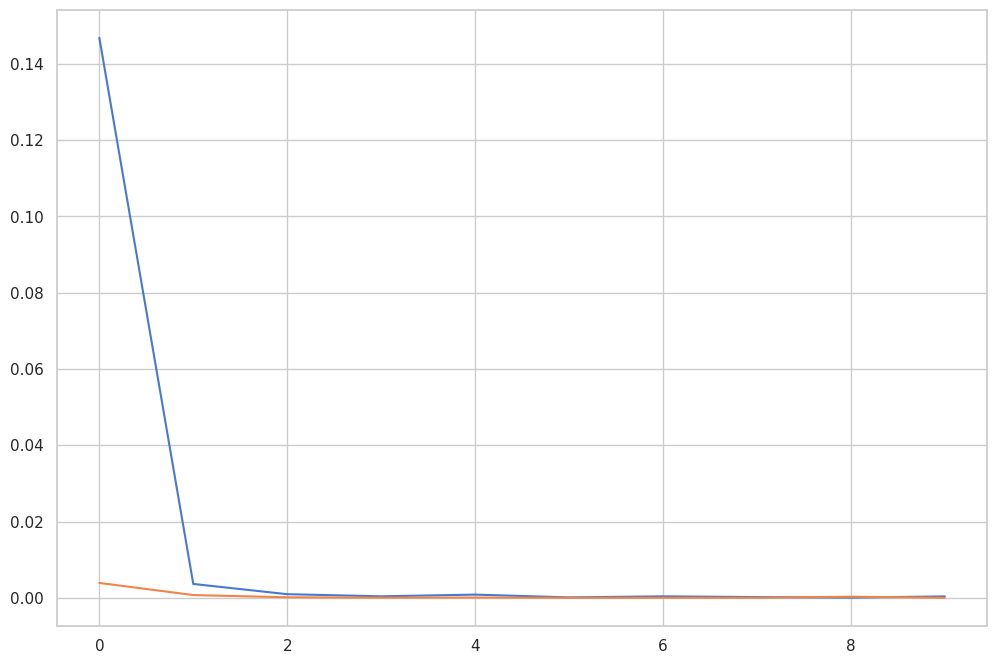

Параметры модели: 100 0.4
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               1500      
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 4)                 404       
                                                                 
Total params: 12004 (46.89 KB)
Trainable params: 12004 (46.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1575/1575 [==============================] - 8s 5ms/step - loss: 0.1579 - accuracy: 0.9418 - val_loss: 0.0035 - v

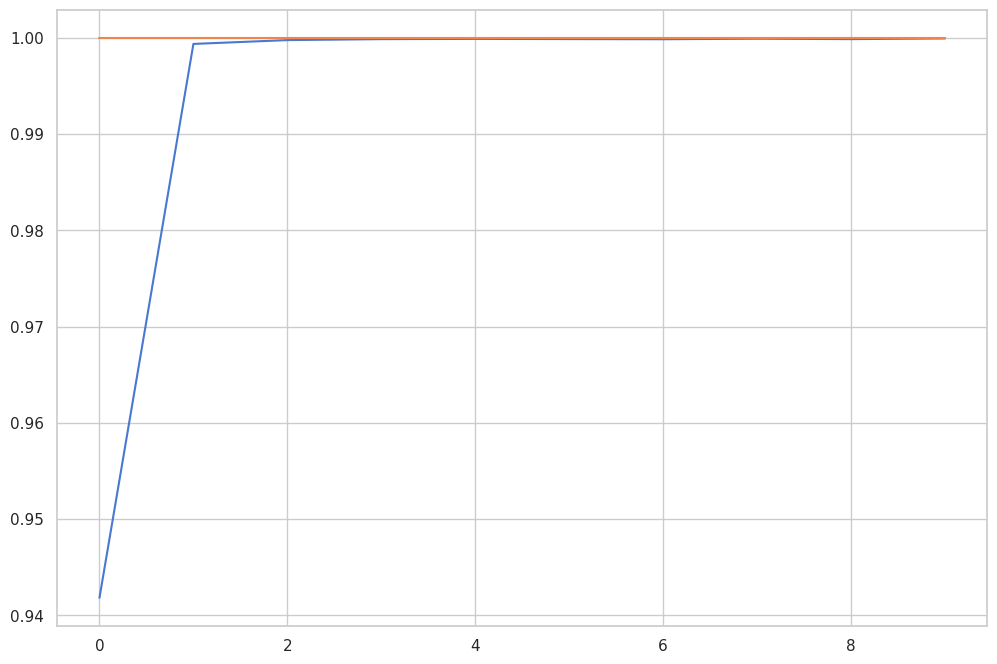

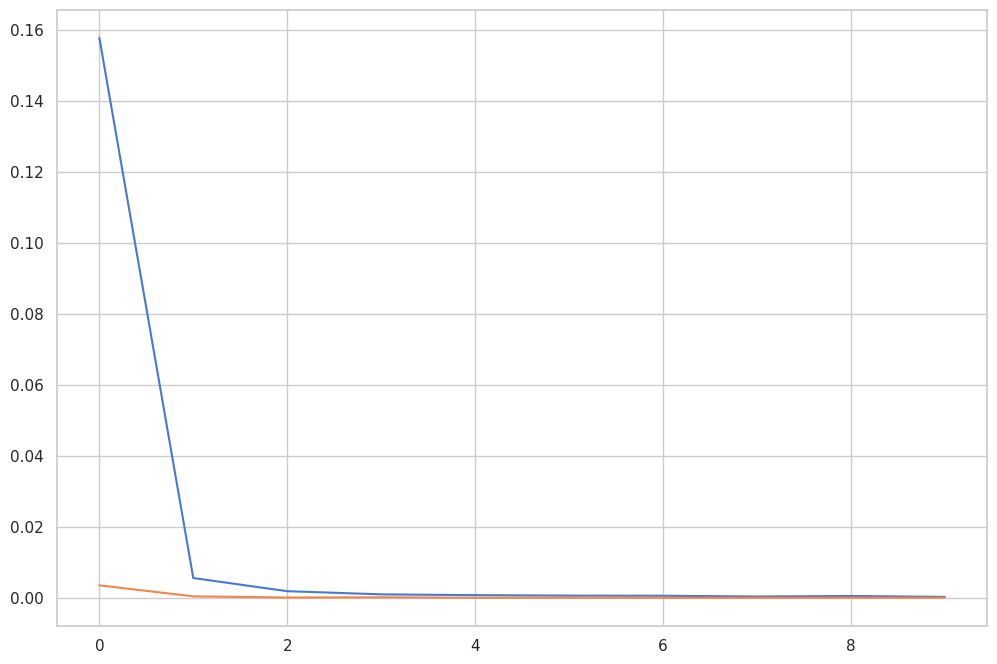

Параметры модели: 400 0.15
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 400)               6000      
                                                                 
 dense_13 (Dense)            (None, 100)               40100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 4)                 404       
                                                                 
Total params: 46504 (181.66 KB)
Trainable params: 46504 (181.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1575/1575 [==============================] - 9s 5ms/step - loss: 0.0884 - accuracy: 0.9678 - val_loss: 7.1610e

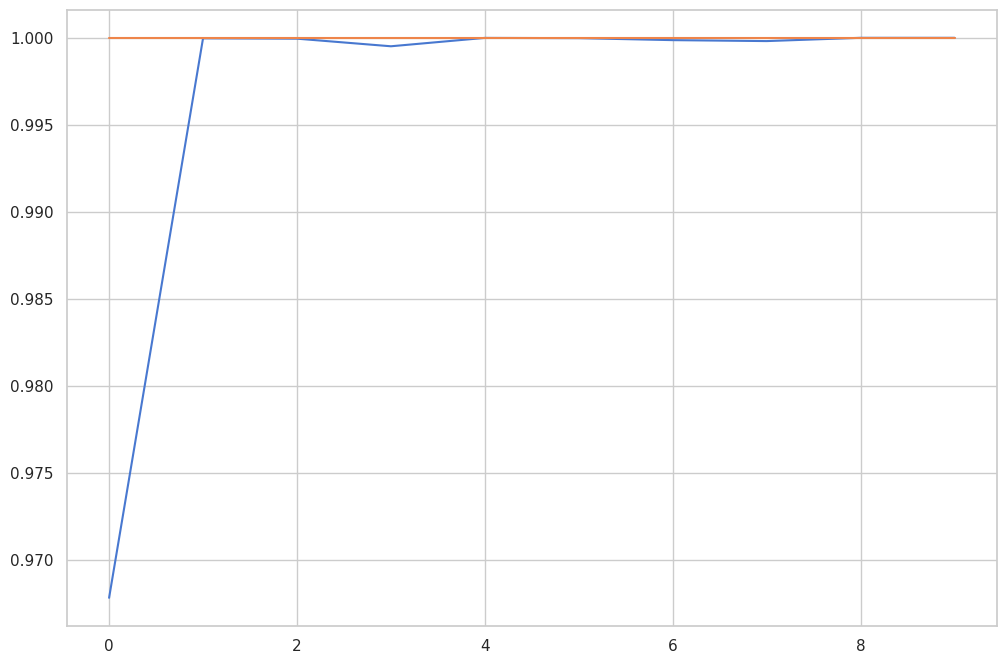

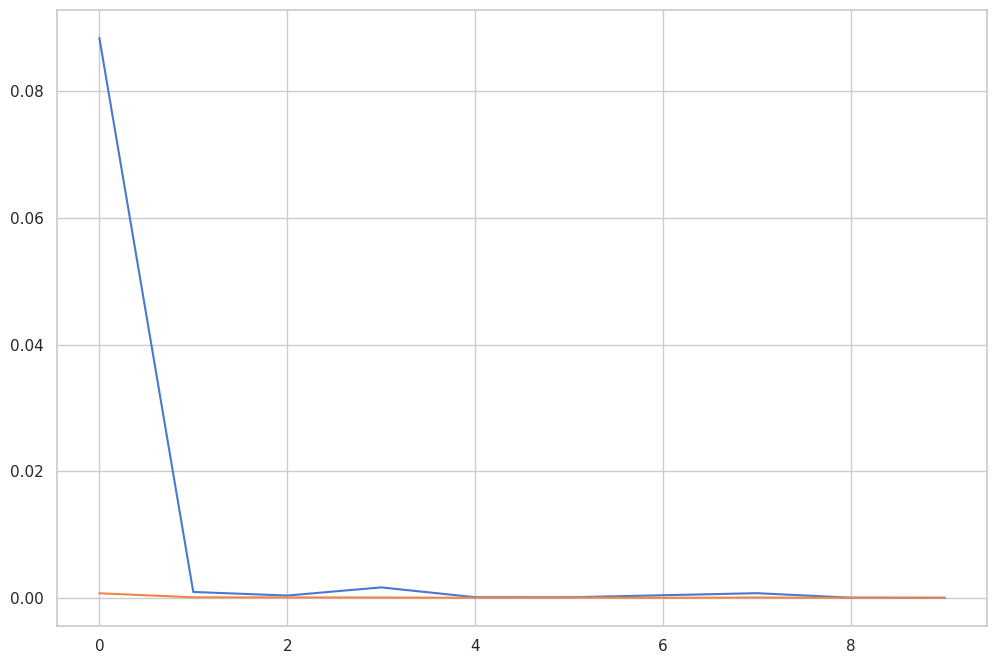

Параметры модели: 400 0.25
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 400)               6000      
                                                                 
 dense_16 (Dense)            (None, 100)               40100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 4)                 404       
                                                                 
Total params: 46504 (181.66 KB)
Trainable params: 46504 (181.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1575/1575 [==============================] - 10s 6ms/step - loss: 0.0837 - accuracy: 0.9707 - val_loss: 6.5908

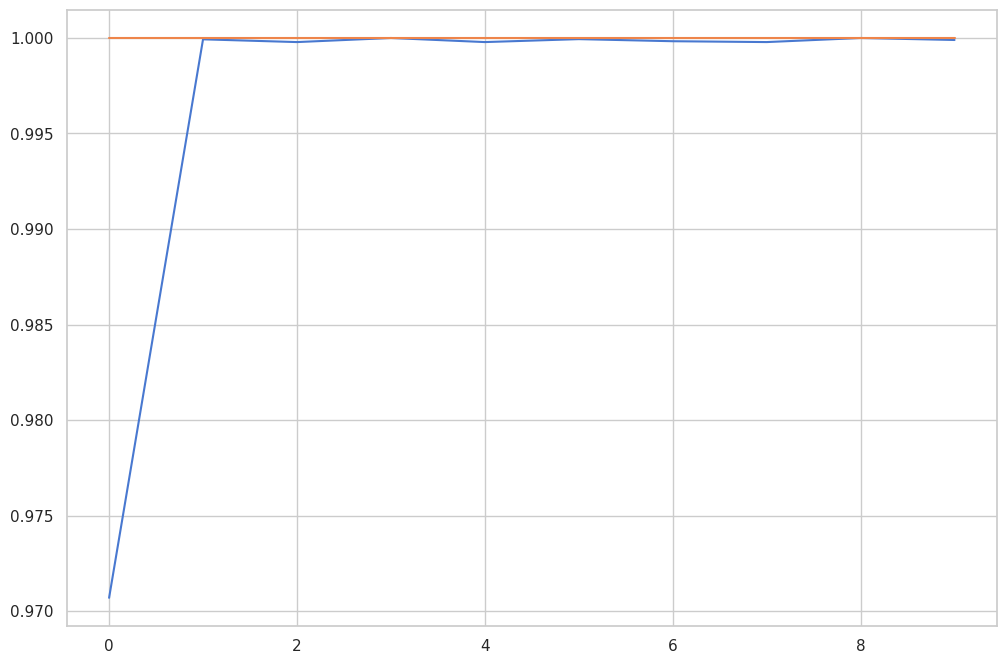

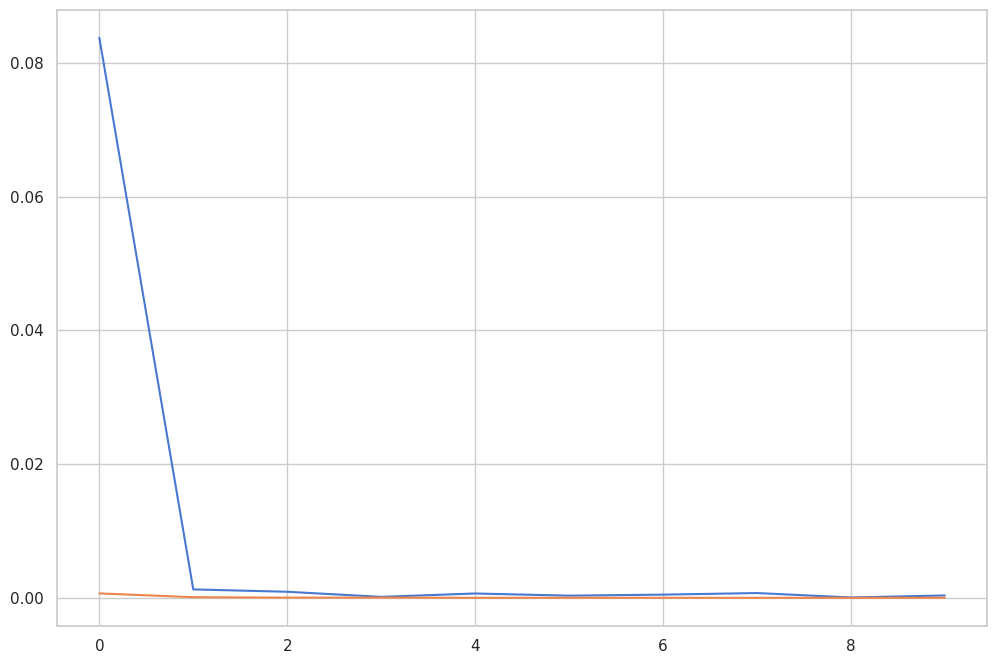

Параметры модели: 400 0.4
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 400)               6000      
                                                                 
 dense_19 (Dense)            (None, 100)               40100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 4)                 404       
                                                                 
Total params: 46504 (181.66 KB)
Trainable params: 46504 (181.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1575/1575 [==============================] - 11s 6ms/step - loss: 0.0997 - accuracy: 0.9648 - val_loss: 7.9057e

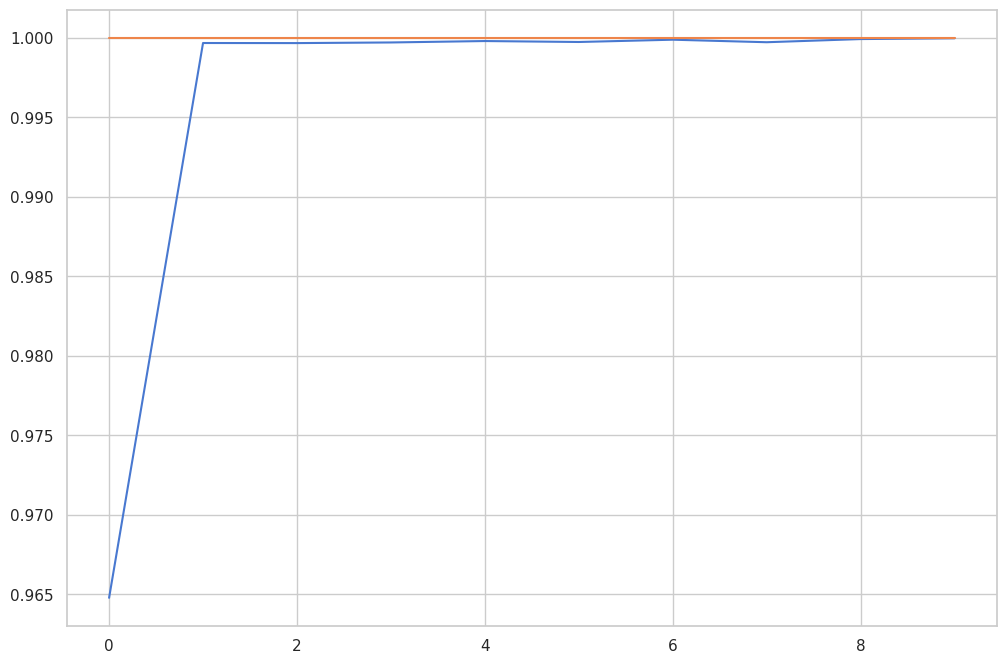

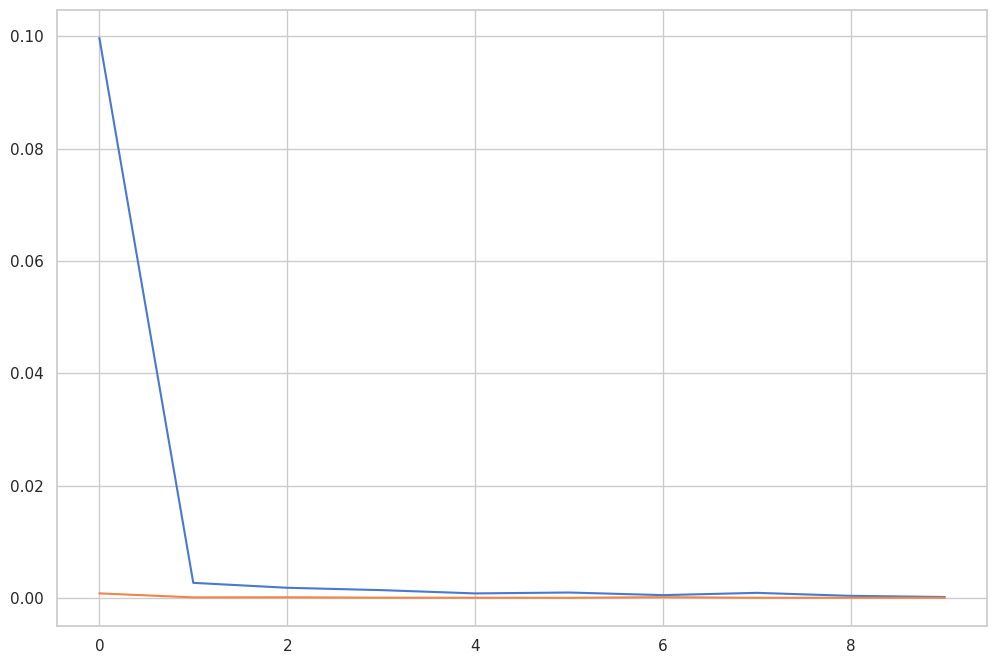

Параметры модели: 700 0.15
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 700)               10500     
                                                                 
 dense_22 (Dense)            (None, 100)               70100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 404       
                                                                 
Total params: 81004 (316.42 KB)
Trainable params: 81004 (316.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0729 - accuracy: 0.9747 - val_loss: 8.0264

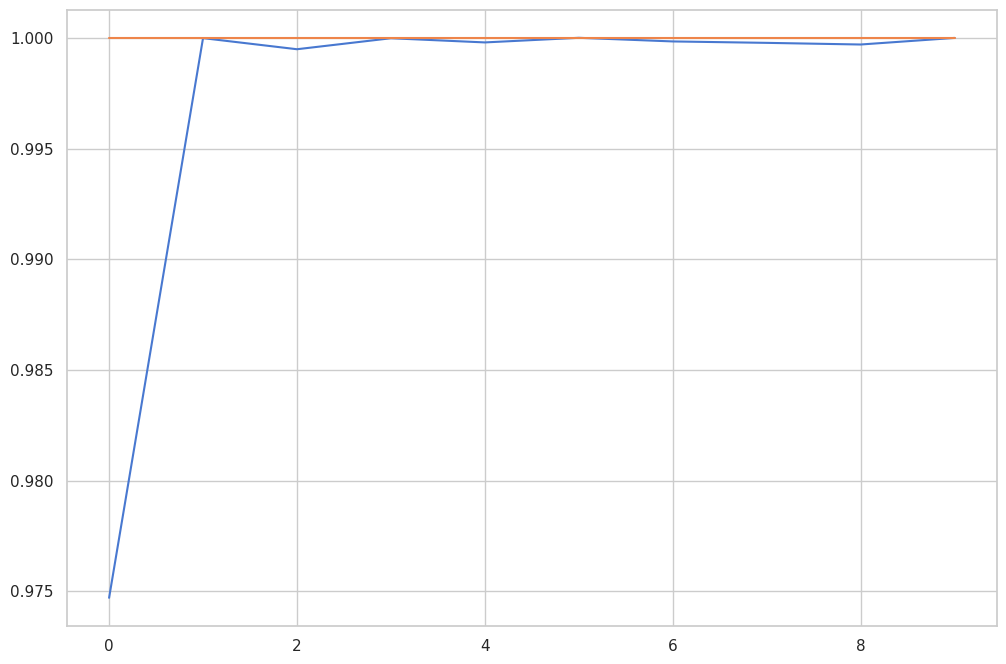

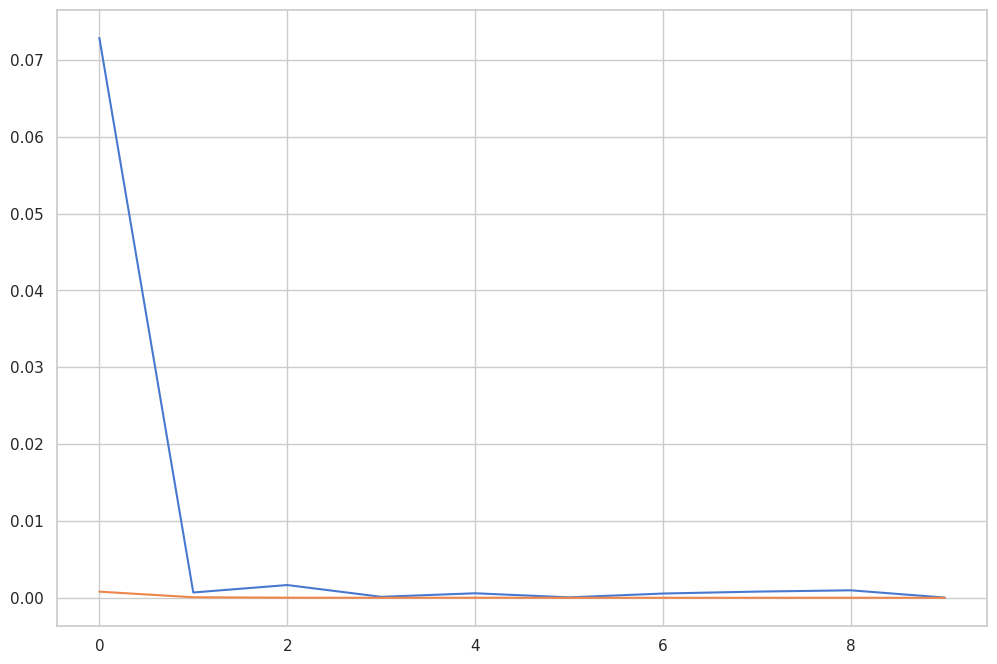

Параметры модели: 700 0.25
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 700)               10500     
                                                                 
 dense_25 (Dense)            (None, 100)               70100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 404       
                                                                 
Total params: 81004 (316.42 KB)
Trainable params: 81004 (316.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1575/1575 [==============================] - 11s 7ms/step - loss: 0.0721 - accuracy: 0.9744 - val_loss: 5.7236

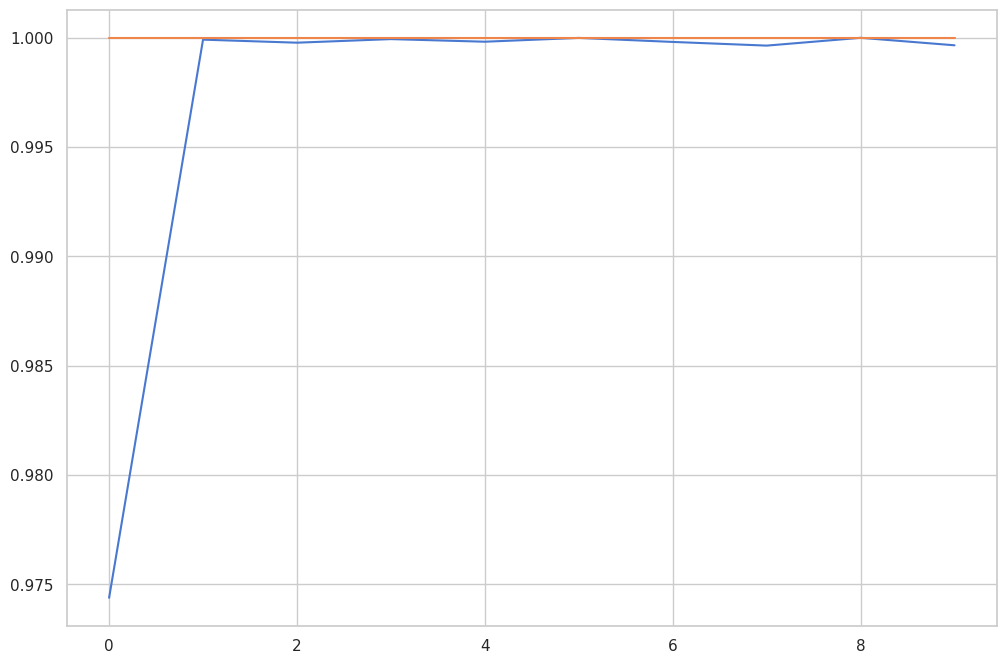

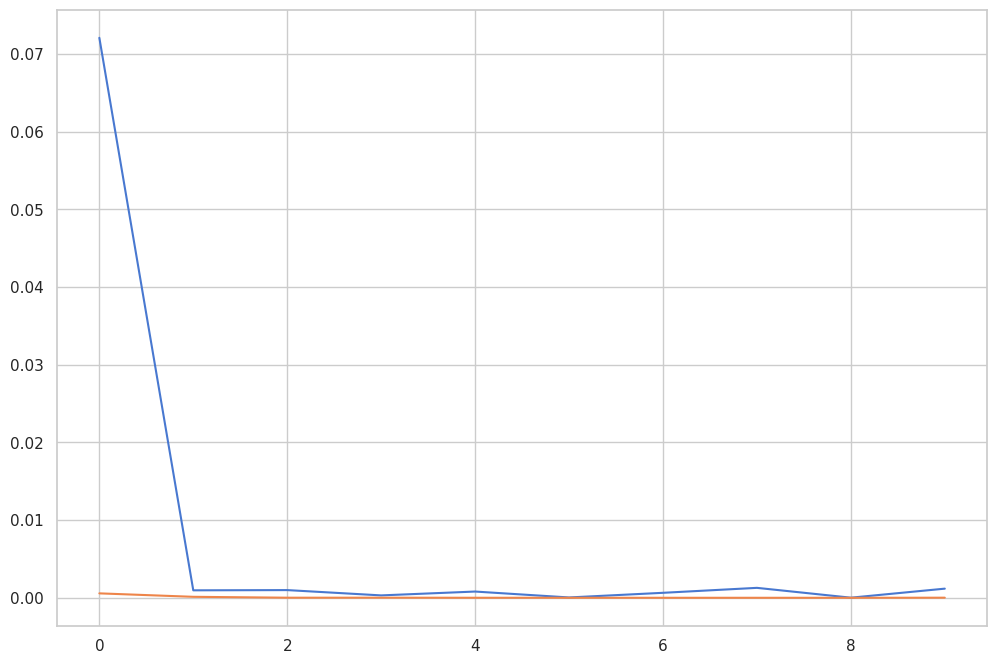

Параметры модели: 700 0.4
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 700)               10500     
                                                                 
 dense_28 (Dense)            (None, 100)               70100     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 404       
                                                                 
Total params: 81004 (316.42 KB)
Trainable params: 81004 (316.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1575/1575 [==============================] - 12s 7ms/step - loss: 0.0834 - accuracy: 0.9711 - val_loss: 8.7979e

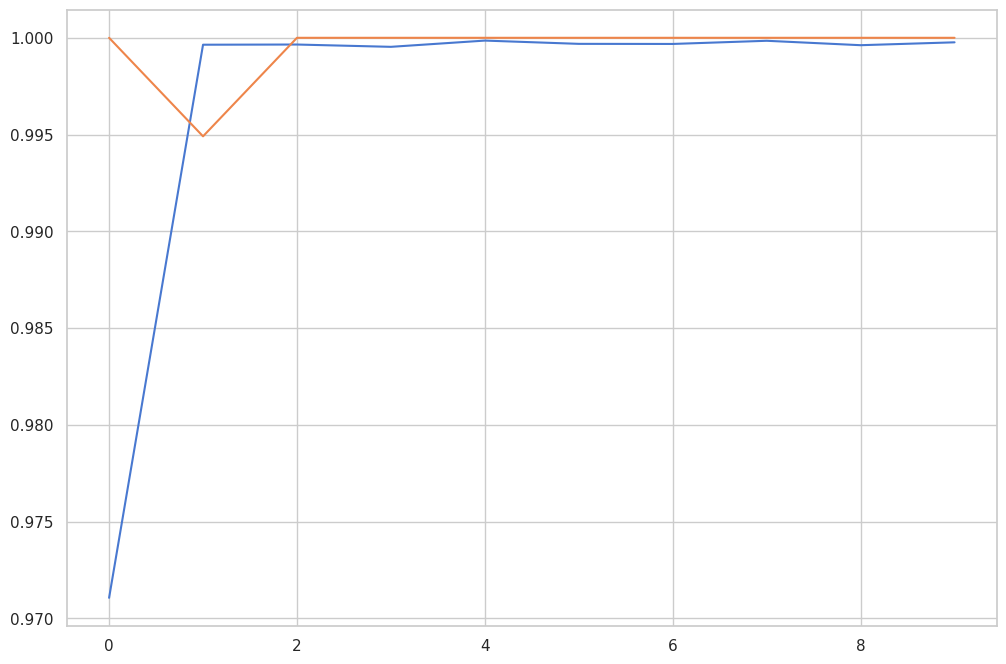

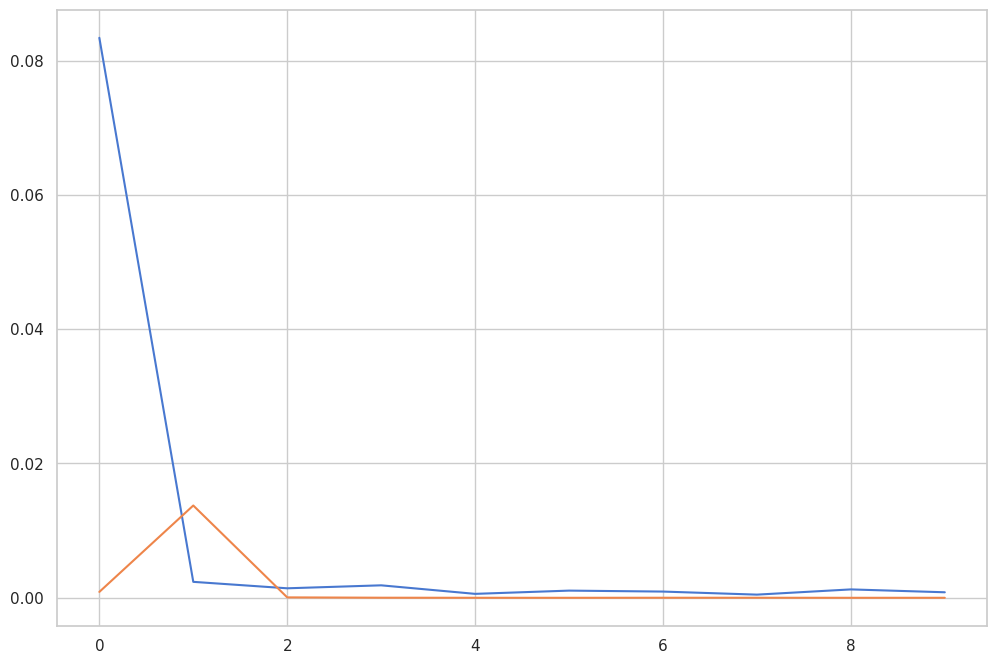

[('Параметры модели:', 100, 0.15, 1.0), ('Параметры модели:', 100, 0.15, 1.0), ('Параметры модели:', 100, 0.25, 1.0), ('Параметры модели:', 100, 0.4, 1.0), ('Параметры модели:', 400, 0.15, 1.0), ('Параметры модели:', 400, 0.25, 1.0), ('Параметры модели:', 400, 0.4, 1.0), ('Параметры модели:', 700, 0.15, 1.0), ('Параметры модели:', 700, 0.25, 1.0), ('Параметры модели:', 700, 0.4, 1.0)]


In [34]:
for i in dense_1:

    for k in drop_1:

      print('Параметры модели:', i, k)

      # Создание последовательной модели
      model = Sequential()

      model.add(Dense(i, input_dim=x_train.shape[1], activation="relu")) # Добавление полносвязного слоя на i нейронов с relu-активацией
      model.add(Dense(100, activation="relu")) # Добавление полносвязного слоя на 100 нейронов с relu-активацией
      model.add(Dropout(k))
      model.add(Dense(4, activation="softmax")) # Добавление полносвязного слоя на 10 нейронов с softmax-активацией

      model.summary()

      # Компиляция модели
      model.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

      # Обучение модели
      history = model.fit(x_train, # обучающая выборка экземпляры класса
                y_train,  # обучающая выборка метки класса
                batch_size=128,  # размер батча
                epochs=10,  # количество эпох
                verbose=1, # 0 - не показывать ход обучения, 1 - показывать
                validation_data=(x_val, y_val)
                )

      ev_list = model.evaluate(x_test, y_test)
      print('Точность на тестовой выборке:', ev_list[1] )

      parameters.append(('Параметры модели:', i, k, ev_list[1]))

      # Вывод графика обучения (точность)

      plt.plot(history.history['accuracy'])
      plt.plot(history.history['val_accuracy'])
      plt.show()

      # Вывод графика обучения (доля ошибки)

      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.show()



print(parameters)

**Оценка модели на тестовой выборке**

In [35]:
model.evaluate(x_test, y_test)

778/778 [==============================] - 2s 3ms/step - loss: 3.3735e-06 - accuracy: 1.0000


[3.3734891076164786e-06, 1.0]